In [5]:
import numpy as np
from scipy.interpolate import approximate_taylor_polynomial as taylor
from scipy.misc import derivative
from scipy.optimize import minimize_scalar
import matplotlib as plt
import matplotlib.pyplot as plt


In [144]:
def fw(f, k, c, x_0):
    """
    f -- function
    k -- number of iterations
    c -- interval where min of f will be found
    """
    x = x_0
    x_mins = []
    for i in range(0, k):
        t_poly = taylor(f, x, degree=1, scale=1)
        y = t_poly
        g = derivative(f, x)
        s_f = lambda s_x: f(x) + (s_x - x) * g
        s = minimize_scalar(s_f, bounds=c, method='bounded')
        gamma = 2/(i+2)

        x_mins.append((x, f(x)))
        x = (1-gamma)*x + gamma*s.x
    return x, np.array(x_mins)

f = lambda x: np.arctan(x) * (x + 5)
f = lambda x: (x/3)**3
bounds = (-5, 5)
start = 3
x_min, x_mins = fw(f, 50, bounds, start)
print(x_min)
print(f(x_min))

-4.99999471072
-4.62961493719


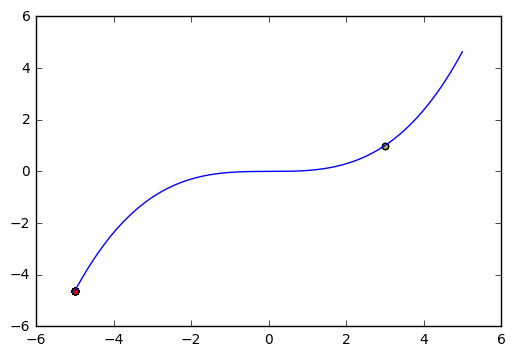

In [145]:
def plot_minimization(x_mins, y_mins, x_func, y_func, min_point = None, start_point = None):
    """
    x_mins -- Xes from minimization
    y_mins -- values function in x_mins
    x_func -- points of initial func
    y_fucn -- values of func in x_func
    min_point -- tuple (x, y) of minimal point
    start_point -- tuple (x, y) of initial point
    """
    from IPython import display
    import time
    
    plt.ion()
    plt.plot(x_func, y_func)
        
    for i, _ in enumerate(x_mins):
        plt.scatter(x_mins[i], y_mins[i])
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(0.01)
    if start_point:
        plt.scatter(start_point[0], start_point[1], c='y')
    if min_point:
        plt.scatter(min_point[0], min_point[1], c='r')
        
X = np.linspace(bounds[0], bounds[1], 256, endpoint=True)
S = f(X)
x_m = x_mins[:, 0]
y_m = x_mins[:, 1]
min_point = (x_min, f(x_min))
start_point = (start, f(start))

plot_minimization(x_m, y_m, X, S, min_point, start_point)